In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [22]:
mean=[4,6]
covar1=[[2,0.7],[0.7,1]]

d1=np.random.multivariate_normal(mean,covar1,500)
#print(d1.shape)
#print(d1)

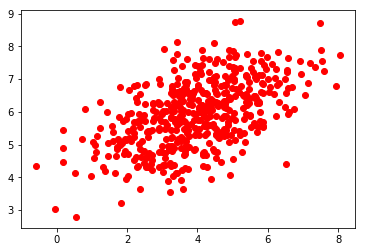

In [23]:
plt.scatter(d1[:,0],d1[:,1],color="red")
plt.show()

In [25]:
mean1=[4,6]
covar1=[[2,0.4],[0.4,1]]

d1=np.random.multivariate_normal(mean1,covar1,500)

mean2=[2,3]
covar2=[[2,0.2],[0.2,1]]

d2=np.random.multivariate_normal(mean2,covar2,500)

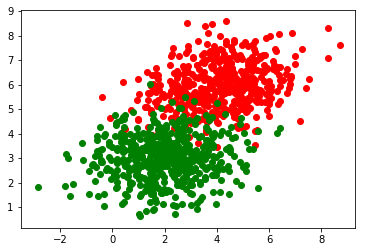

In [26]:
plt.scatter(d1[:,0],d1[:,1],color="red")
plt.scatter(d2[:,0],d2[:,1],color="green")
plt.show()

In [27]:
print(d1.shape)
print(d2.shape)

(500, 2)
(500, 2)


# Create Dataset

In [44]:
dataset=np.zeros((d1.shape[0]+d2.shape[0],d1.shape[1]+1))
print(dataset.shape)
dataset[:d1.shape[0],:2]=d1
dataset[d1.shape[0]:,:2]=d2
dataset[d1.shape[0]:,-1]=1
print(dataset)
np.random.shuffle(dataset)
print(dataset)

(1000, 3)
[[4.50012302 5.952112   0.        ]
 [3.51226025 5.83683565 0.        ]
 [5.87094982 5.59596456 0.        ]
 ...
 [1.03873192 0.72465693 1.        ]
 [0.1927926  2.00634797 1.        ]
 [5.37413767 3.36921989 1.        ]]
[[4.34009396 3.38898405 1.        ]
 [1.71024478 5.94161832 0.        ]
 [2.65903254 5.75894812 0.        ]
 ...
 [0.5859304  2.93485234 1.        ]
 [3.7478005  6.03202179 0.        ]
 [2.48935967 2.67596775 1.        ]]


In [45]:
split=(int)(0.8*dataset.shape[0])
print(split)

800


In [52]:
X_train=dataset[:split,:2]
y_train=dataset[:split,-1]

X_test=dataset[split:,:2]
y_test=dataset[split:,-1]
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(800, 2)
(800,)
(200, 2)
(200,)


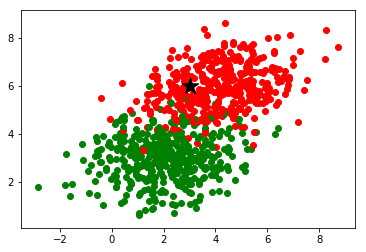

In [125]:
#label 0 is for red and label 1 is for green
test_point=[3,6]
for point,label in zip(X_train,y_train):
    if label==0:
        plt.scatter(point[0],point[1],color="red")
    else:
        plt.scatter(point[0],point[1],color="green")
plt.scatter(test_point[0],test_point[1],color="black",s=300,marker="*")
plt.show()

In [126]:
def eucledian_distance(x,y):
    return np.sqrt(np.sum((x-y)**2))


In [127]:
point1=np.array([3,5])
point2=np.array([1,2])
dist=eucledian_distance(point1,point2)
print(dist)

3.605551275463989


In [128]:
def knn(x_train,y_train,test_point,k=5):
    #1. make an empty distance list and fill that list with distances from all points from training set.
    distances=[]
    for point,label in zip(x_train,y_train):
        dist=eucledian_distance(point,test_point)
        distances.append((dist,label))
    #2. sort on basis of distances
    distances=sorted(distances, key=lambda x:x[0])
    distances=np.array(distances)
    #3. select k nearest neighbors
    distances=distances[:k]
    
    #4. get the lebel counts
    freq=np.unique(distances[:,1],return_counts=True)
    labels,counts=freq
    ans=labels[counts.argmax()]
    
    return ans

In [129]:
pred=knn(X_train,y_train,test_point,k=10)
print(pred)

0.0


In [130]:
def get_all_predictions(x_train,y_train,x_test,k=5):
    predictions=[]
    for test_point in x_test:
        test_label=knn(x_train,y_train,test_point,k)
        predictions.append(test_label)
    return predictions

In [131]:
all_predictions=get_all_predictions(X_train,y_train,X_test,k=5)
print(all_predictions)

[0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0]

In [132]:
def get_accuracy(predictions,true_labels):
    return (predictions==true_labels).sum()/true_labels.shape[0]

In [133]:
print(get_accuracy(all_predictions,y_test))

0.93


# MNIST

In [99]:
df=pd.read_csv("../Datasets/mnist/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [100]:
df=df.values

In [101]:
print(df.shape)

(42000, 785)


In [102]:
df=df[:5000]
print(df.shape)

(5000, 785)


In [106]:
split=(int)(0.8*df.shape[0])
mnist_x_train=df[:split,1:]
mnist_y_train=df[:split,0]

mnist_x_test=df[split:,1:]
mnist_y_test=df[split:,0]

print(mnist_x_train.shape)
print(mnist_y_train.shape)
print(mnist_x_test.shape)
print(mnist_y_test.shape)

(4000, 784)
(4000,)
(1000, 784)
(1000,)


In [110]:
print("label:" ,mnist_y_train[1000])

label: 1


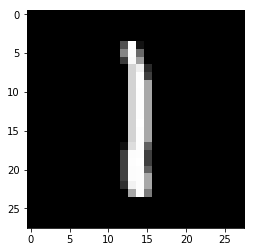

In [112]:
img=mnist_x_train[1000].reshape(28,28)
plt.imshow(img,cmap="gray")

In [113]:
mnist_all_predictions=get_all_predictions(mnist_x_train,mnist_y_train,mnist_x_test,k=5)

In [114]:
print(get_accuracy(mnist_all_predictions,mnist_y_test))

0.928


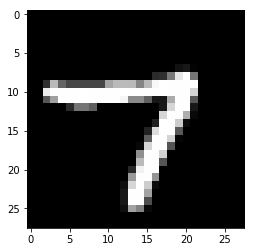

my predicted label 7.0
true label 7


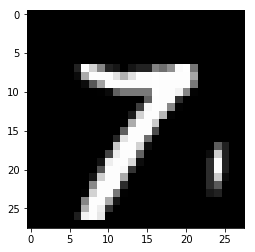

my predicted label 7.0
true label 7


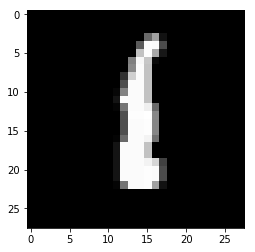

my predicted label 1.0
true label 1


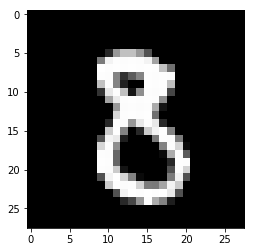

my predicted label 8.0
true label 8


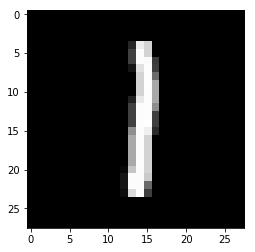

my predicted label 1.0
true label 1


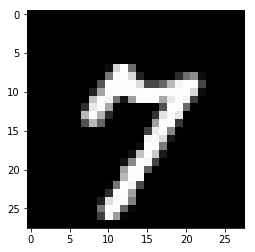

my predicted label 7.0
true label 7


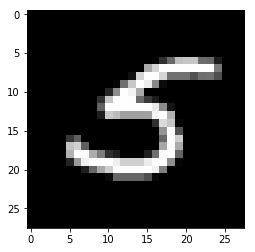

my predicted label 5.0
true label 5


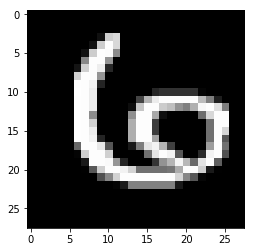

my predicted label 6.0
true label 6


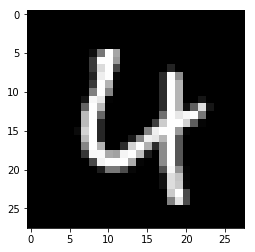

my predicted label 4.0
true label 4


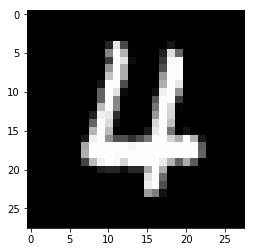

my predicted label 4.0
true label 4


In [116]:
ten_test_examples=mnist_x_test[200:210,:]
ten_test_labels=mnist_y_test[200:210]

for test_point,test_label in zip(ten_test_examples,ten_test_labels):
    my_pred=knn(mnist_x_train,mnist_y_train,test_point,k=5)
    img=test_point.reshape(28,28)
    plt.imshow(img,cmap="gray")
    plt.show()
    print("my predicted label",my_pred)
    print("true label", test_label)

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
mnist_sk_learn=KNeighborsClassifier(n_neighbors=5)

In [123]:
mnist_sk_learn.fit(mnist_x_train,mnist_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [124]:
print(mnist_sk_learn.score(mnist_x_test,mnist_y_test))

0.928
